In [29]:
import numpy as np
import matplotlib.pyplot as plt

config_path = 'results/config.json'
output_path = 'results/coords.xyz'
distribution_path = 'results/distribution.txt'
chars_path = 'results/chars.txt'

Text(0, 0.5, 'E/E_0')

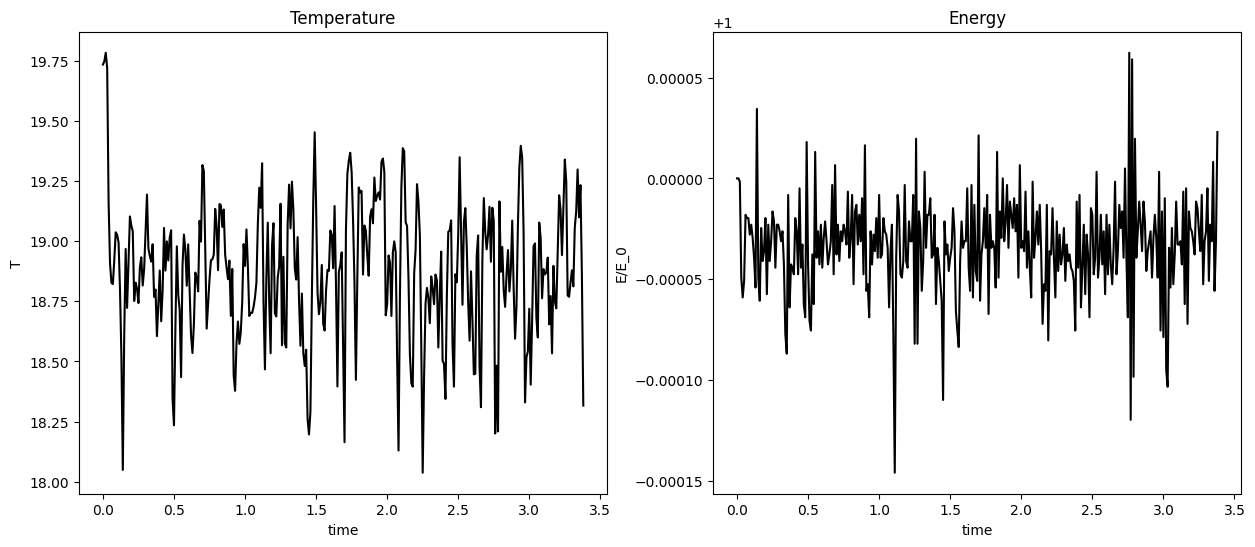

In [31]:
cnt = 10 / 1000 # шаг 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

with open(chars_path, 'r') as f:
    energys = []
    temperature = []
    std = []
    for line in f.readlines():
        a, b, c = line.split()
        energys.append(float(a))
        std.append(float(b))
        temperature.append(float(c))

axs[0].plot(np.arange(len(temperature))*cnt, np.array(temperature), color='black')
axs[0].set_title('Temperature')
axs[0].set_xlabel('time')
axs[0].set_ylabel('T')

axs[1].plot(np.arange(len(energys))*cnt, np.array(energys) / energys[0], color='black')
axs[1].set_title('Energy')
axs[1].set_xlabel('time')
axs[1].set_ylabel('E/E_0')

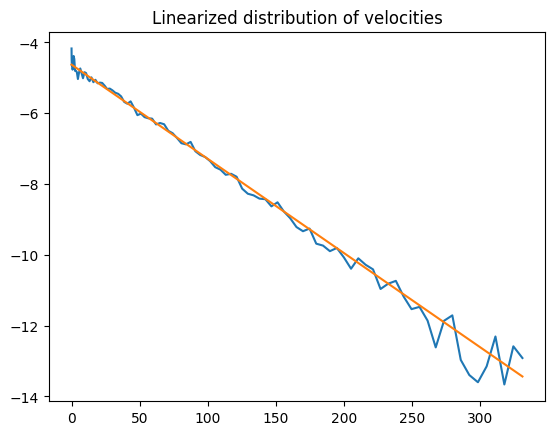

In [24]:
v = []
with open(distribution_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if len(line.split(' ')) == 1:
            continue
        v.append(sum([float(_)**2 for _ in line.split(' ')])**0.5)

hist_, bin_edges = np.histogram(v, bins='auto', density=True)

T = 18.8
A = 3 / 2 * np.log((1 / (2 * np.pi * T))) + np.log(4 * np.pi)
B = - 1 / (2 * T)

# Примерные данные
X = (bin_edges**2)[:-1]
y = np.log(hist_) -  2 * np.log(bin_edges[:-1])

# Добавляем столбец единиц для свободного члена
X_matrix = np.vstack([X, np.ones(len(X))]).T

# Находим коэффициенты
A_, B_ = np.linalg.lstsq(X_matrix, y, rcond=None)[0]

plt.plot(X, y)
plt.title("Linearized distribution of velocities")
plt.plot(np.linspace(0, max(X), 2), A + B * np.linspace(0, max(X), 2))

Text(0.5, 1.0, 'Root mean square distance to molecules')

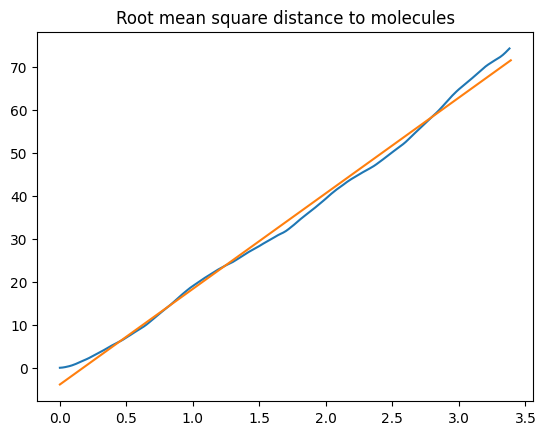

In [25]:
X, y = np.arange(len(std))*cnt, np.array(std)**2 - std[0]**2
X_matrix = np.vstack([X, np.ones(len(X))]).T

# Находим коэффициенты
A_, B_ = np.linalg.lstsq(X_matrix, y, rcond=None)[0]
plt.plot(X, y)
plt.plot(np.linspace(0, len(std)*cnt, 2), B_ + A_ * np.linspace(0, len(std)*cnt, 2))
plt.title("Root mean square distance to molecules")

In [26]:
# Коэффициент диффузии
D = A_ / 6
D

3.703971509906301

In [28]:
# Длина свбодного пробега
# D = 1 / 3 * V * l
lambd = 3 * D / np.mean(v)
lambd

1.5955945195577728